In [1]:
#-------------------- Import Libraries ------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import requests

In [12]:
#-------------------- API Request and Error handling---------------------------------------------------------------------

In [13]:
# Get dataset from the API
#-----------------------
url ="https://data.cdc.gov/resource/7b9s-s8ck.json"  # 200, Data fetched successfully.

# Wrong URL - Getting 404 HTTP Error
#-------------------------------------
# url ="https://data.cdc.gov/resources/7b9s-s8ck.json"  # 404
      # HTTP error occurred: 404 Client Error: Not Found for url: https://data.cdc.gov/resources/7b9s-s8ck.json

# Handling the error using try-except block
#-------------------------------------------

try:
    response = requests.get(url)
    print(response.status_code)  # Check 200 if the request was successful
    response.raise_for_status()  # Raise an exceptions for bad responses like 404 or 500
    data = response.json()  # Parse the JSON data    
    print("Data fetched successfully.")
except requests.exceptions.HTTPError as err:    
    print(f"HTTP error occurred: {err}")
except requests.exceptions.RequestException as err:
    print(f"API request failed:: {err}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

200
Data fetched successfully.


In [5]:
#---------------------------Loading data into DataFrame ------------------------------------------------------------------------

In [14]:

df = pd.DataFrame(data)
df

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,...,data_value_footnote,confidence_limit_low,confidence_limit_high,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,locationid
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),665.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NA,567.7,767.7,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,01001
996,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),667.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NA,597.1,747.8,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,01001
997,2004,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),813.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NA,697.6,919.9,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,01001
998,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),687.9,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NA,594.1,776.7,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,01001


In [7]:
# -----------------------Checking how many rows and columns in the dataset--------------------------------------------------

In [15]:

df.shape

(1000, 21)

In [9]:
#-------------------------------------- Pagination (why?) --------------------------------------------------------------------------
# my dataset has 5770240 rows and 21 columns but shape is showing (1000,21)
# So added Pagination
# rows_per_request = 500000 (code took 2m, 4m 33.7s to execute. import statement took 3.6s, everything else took 0.0sec,0.6sec)
#-------------------------------------------------------------------------------------------------------------------------------

In [16]:


#-------------------- Pagination -------------------------------------------------------------------------------------------
rows_per_request = 500000
total_rows = 5770240  # from API info
dfs = []

for offset in range(0, total_rows, rows_per_request):
    url = f"https://data.cdc.gov/resource/7b9s-s8ck.json?$limit={rows_per_request}&$offset={offset}"
    response = requests.get(url)
    data = response.json()
    df_chunk = pd.DataFrame(data)
    dfs.append(df_chunk)
    print(f"Fetched rows {offset} to {offset + rows_per_request}")

# Combine all chunks
df_full = pd.concat(dfs, ignore_index=True)
print(df_full.shape)  

# Output
# Fetched rows 0 to 500000
# Fetched rows 500000 to 1000000
# Fetched rows 1000000 to 1500000
# Fetched rows 1500000 to 2000000
# Fetched rows 2000000 to 2500000
# Fetched rows 2500000 to 3000000
# Fetched rows 3000000 to 3500000
# Fetched rows 3500000 to 4000000
# Fetched rows 4000000 to 4500000
# Fetched rows 4500000 to 5000000
# Fetched rows 5000000 to 5500000
# Fetched rows 5500000 to 6000000
# (5770240, 21)

Fetched rows 0 to 500000
Fetched rows 500000 to 1000000
Fetched rows 1000000 to 1500000
Fetched rows 1500000 to 2000000
Fetched rows 2000000 to 2500000
Fetched rows 2500000 to 3000000
Fetched rows 3000000 to 3500000
Fetched rows 3500000 to 4000000
Fetched rows 4000000 to 4500000
Fetched rows 4500000 to 5000000
Fetched rows 5000000 to 5500000
Fetched rows 5500000 to 6000000
(5770240, 21)


In [ ]:
#----------------------------------Splitting the dataset into multiple datasets (why?)---------------------------------------------
# As it has 5770240 I couldn't open it in online excel.So I decided to split the dataframe 
# I checked year and locationabbr (state) column 
# year column has 20 unique values. If I split based on year then i will endup in 20 dataframe
# and state column has 50 unique values.If I split by state I will end up in 50 dataframes. 
# topic column has only 5 unique values.so I decided to split my dataframe based on 'topic' 

In [ ]:
#-------------------------Getting unique values of 'topic' column--------------------------------------------------------------

In [ ]:
sorted(df['topic'].unique())

# ['All heart disease',
#  'All stroke',
#  'Cardiovascular disease (CVD)',
#  'Coronary heart disease (CHD)',
#  'Heart failure']


['All heart disease',
 'All stroke',
 'Cardiovascular disease (CVD)',
 'Coronary heart disease (CHD)',
 'Heart failure']

In [ ]:
#-----------------------------Getting only 'All heart disease' topic values-----------------------------------------------------

In [17]:
# Create separate DataFrame for ALL HEART DISEASE
df_heart_disease = df_full[df_full['topic'] == 'All heart disease'].copy()
df_heart_disease


,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,...,data_value_footnote,confidence_limit_low,confidence_limit_high,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,locationid
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770211,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,All heart disease,NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Black (Non-Hispanic),Sex,Overall,56045
5770220,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,All heart disease,NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,56045
5770221,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,All heart disease,NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,56045
5770230,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,All heart disease,-24.8,%,Total percent change,...,NA,-34.9,-13.9,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045


In [18]:
#-----------------------------------------------Data Wrangling-------------------------------------------------------------------

In [ ]:
# finding number of rows and columns in ALL HEART DISEASE DataFrame
# number of rows reduced to 1154048 from 5770240 rows
#---------------------------------------------------------------------
df_heart_disease.shape

(1154048, 21)

In [19]:
# finding all columns name in ALL HEART DISEASE DataFrame
#------------------------------------------------------------------
df_heart_disease.columns

Index(['year', 'locationabbr', 'locationdesc', 'geographiclevel', 'datasource',
       'class', 'topic', 'data_value', 'data_value_unit', 'data_value_type',
       'data_value_footnote_symbol', 'data_value_footnote',
       'confidence_limit_low', 'confidence_limit_high',
       'stratificationcategory1', 'stratification1', 'stratificationcategory2',
       'stratification2', 'stratificationcategory3', 'stratification3',
       'locationid'],
      dtype='object')

In [ ]:
# Finding unique values in specific columns of ALL HEART DISEASE DataFrame
#--------------------------------------------------------------------------
columns_to_check = [
    'year', 'locationabbr', 'locationdesc', 'geographiclevel', 'datasource',
       'class', 'topic', 'data_value', 'data_value_unit', 'data_value_type',
       'data_value_footnote_symbol', 'data_value_footnote',
       'confidence_limit_low', 'confidence_limit_high',
       'stratificationcategory1', 'stratification1', 'stratificationcategory2',
       'stratification2', 'stratificationcategory3', 'stratification3',
       'locationid'
]

for col in columns_to_check:
    unique_values = df_heart_disease[col].unique()
    print(f"Unique values in '{col}':\n{unique_values}\n")


Unique values in 'year':
['1999' '2013' '2014' '2005' '2012' '2010' '2009' '2011' '2007' '2019'
 '2018' '2004' '2016' '2015' '2000' '2002' '2003' '2006' '2008' '2001'
 '2017' '1999 - 2010' '2010 - 2019']

Unique values in 'locationabbr':
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']

Unique values in 'locationdesc':
['Autauga' 'Baldwin' 'Barbour' ... 'Uinta' 'Washakie' 'Weston']

Unique values in 'geographiclevel':
['County']

Unique values in 'datasource':
['NVSS']

Unique values in 'class':
['Cardiovascular Diseases']

Unique values in 'topic':
['All heart disease']

Unique values in 'data_value':
['NA' '128.7' '128.1' ... '-62.7' '-60.7' '-56.9']

Unique values in 'data_value_unit':
['per 100,000' '%']

Unique values in 'data_value_type':
['Age-Standardized, Spatiotemporal

In [ ]:
#-------------------------Finding what data needs to be cleaned--------------------------------------------------------------

In [ ]:
#------------------------Below columns have single value for all rows------------------------------------------
                        # Unique values in 'geographiclevel':
                        # ['County']

                        # Unique values in 'datasource':
                        # ['NVSS']

                        # Unique values in 'stratificationcategory1':
                        # ['Age group']

                        # Unique values in 'stratificationcategory2':
                        # ['Race']

                        # Unique values in 'stratificationcategory3':
                        # ['Sex']

                        # Unique values in 'class':
                        # ['Cardiovascular Diseases']

#------------------------Below columns have NA for some rows-----------------------------------------------------

                        # Unique values in 'data_value':
                        # ['NA' '128.7' '128.1' ... '-62.7' '-60.7' '-56.9']

                        # Unique values in 'data_value_footnote_symbol':
                        # ['~' 'NA']

                        # Unique values in 'data_value_footnote':
                        # ['Value suppressed' 'NA']

                        # Unique values in 'confidence_limit_low':
                        # ['NA' '113.1' '114.1' ... '-73.8' '-70.3' '-65.9']

                        # Unique values in 'confidence_limit_high':
                        # ['NA' '144.7' '145.5' ... '-48.5' '-52.4' '-47.3']

#------------------------Year column cleaning for range '1999 - 2010' '2010 - 2019'-----------------------------------------------
                        # Unique values in 'year':
                        #     ['1999' '2013' '2014' '2005' '2012' '2010' '2009' '2011' '2007' '2019'
                        #     '2018' '2004' '2016' '2015' '2000' '2002' '2003' '2006' '2008' '2001'
                        #     '2017' '1999 - 2010' '2010 - 2019']

In [ ]:
#---------------------- Dropping columns with single value for all rows and unwanted columns----------------------------------------
#---------------------- Column reduced from 21 to 12 columns------------------------------------------------------------------------

In [20]:
# drop data_value_int - per 100,000
# drop data_value_type - Age-Standardized, Spatiotemporally Smoothed Rate
cols_to_drop = ['geographiclevel','datasource','class', 'stratificationcategory1', 'stratificationcategory2', 'stratificationcategory3','data_value_footnote_symbol','data_value_footnote']
df_heart_disease_cleaned = df_heart_disease.drop(columns=cols_to_drop)
print(df_heart_disease_cleaned.shape)  # Should reflect the columns dropped
df_heart_disease_cleaned



(1154048, 13)


,year,locationabbr,locationdesc,topic,data_value,data_value_unit,data_value_type,confidence_limit_low,confidence_limit_high,stratification1,stratification2,stratification3,locationid
0,1999,AL,Autauga,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NA,NA,Ages 35-64 years,American Indian/Alaska Native,Overall,01001
1,2013,AL,Autauga,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NA,NA,Ages 35-64 years,American Indian/Alaska Native,Overall,01001
2,2014,AL,Autauga,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NA,NA,Ages 35-64 years,American Indian/Alaska Native,Overall,01001
3,2005,AL,Autauga,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NA,NA,Ages 35-64 years,American Indian/Alaska Native,Overall,01001
4,2012,AL,Autauga,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NA,NA,Ages 35-64 years,American Indian/Alaska Native,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770211,2010 - 2019,WY,Weston,All heart disease,NA,%,Total percent change,NA,NA,Ages 65 years and older,Black (Non-Hispanic),Overall,56045
5770220,1999 - 2010,WY,Weston,All heart disease,NA,%,Total percent change,NA,NA,Ages 65 years and older,Hispanic,Overall,56045
5770221,2010 - 2019,WY,Weston,All heart disease,NA,%,Total percent change,NA,NA,Ages 65 years and older,Hispanic,Overall,56045
5770230,1999 - 2010,WY,Weston,All heart disease,-24.8,%,Total percent change,-34.9,-13.9,Ages 65 years and older,White,Overall,56045


In [ ]:
#---------------------------------Checking for duplicate values in ALL HEART DISEASE DataFrame--------------------------------

In [21]:
# Returns a boolean Series showing True for duplicated rows (except first occurrence)
duplicates = df_heart_disease_cleaned.duplicated()
# print(duplicates)
duplicates.unique()

# # Show all duplicate rows (including first occurrences)
# duplicate_rows = df_heart_disease_cleaned[df_heart_disease_cleaned.duplicated(keep=False)]

# print(f"Number of duplicate rows (excluding first): {duplicates.sum()}")
# print(duplicate_rows)


array([False])

In [ ]:
#------------------------------------Cleaning 'NA' values in ALL HEART DISEASE DataFrame----------------------------------------
#-----------------------number of rows reduced to 680,953 from 1154048 rows--------------------------------------------

In [22]:
df_heart_disease_cleaned_for_NA = df_heart_disease_cleaned[df_heart_disease_cleaned['data_value'] != 'NA']
df_heart_disease_cleaned_for_NA

# Unique values in 'data_value_footnote_symbol':
# ['~' 'NA']

# Unique values in 'data_value_footnote':
# ['Value suppressed' 'NA']


,year,locationabbr,locationdesc,topic,data_value,data_value_unit,data_value_type,confidence_limit_low,confidence_limit_high,stratification1,stratification2,stratification3,locationid
108,2017,AL,Autauga,All heart disease,128.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",113.1,144.7,Ages 35-64 years,Overall,Overall,01001
109,2016,AL,Autauga,All heart disease,128.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",114.1,145.5,Ages 35-64 years,Overall,Overall,01001
110,2019,AL,Autauga,All heart disease,122.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",106.4,143.4,Ages 35-64 years,Overall,Overall,01001
111,2006,AL,Autauga,All heart disease,164,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",142.5,194,Ages 35-64 years,Overall,Overall,01001
112,2003,AL,Autauga,All heart disease,159.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",137.4,189.5,Ages 35-64 years,Overall,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770181,1999 - 2010,WY,Weston,All heart disease,-27.5,%,Total percent change,-40.1,-16.8,Ages 65 years and older,Overall,Women,56045
5770190,2010 - 2019,WY,Weston,All heart disease,-4.1,%,Total percent change,-20.5,16.8,Ages 65 years and older,Overall,Men,56045
5770191,1999 - 2010,WY,Weston,All heart disease,-22.3,%,Total percent change,-32.3,-9.3,Ages 65 years and older,Overall,Men,56045
5770230,1999 - 2010,WY,Weston,All heart disease,-24.8,%,Total percent change,-34.9,-13.9,Ages 65 years and older,White,Overall,56045


In [23]:
df_heart_disease_cleaned_for_missing_value = df_heart_disease_cleaned_for_NA.dropna(subset=['data_value'])
df_heart_disease_cleaned_for_missing_value

,year,locationabbr,locationdesc,topic,data_value,data_value_unit,data_value_type,confidence_limit_low,confidence_limit_high,stratification1,stratification2,stratification3,locationid
108,2017,AL,Autauga,All heart disease,128.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",113.1,144.7,Ages 35-64 years,Overall,Overall,01001
109,2016,AL,Autauga,All heart disease,128.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",114.1,145.5,Ages 35-64 years,Overall,Overall,01001
110,2019,AL,Autauga,All heart disease,122.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",106.4,143.4,Ages 35-64 years,Overall,Overall,01001
111,2006,AL,Autauga,All heart disease,164,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",142.5,194,Ages 35-64 years,Overall,Overall,01001
112,2003,AL,Autauga,All heart disease,159.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",137.4,189.5,Ages 35-64 years,Overall,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770181,1999 - 2010,WY,Weston,All heart disease,-27.5,%,Total percent change,-40.1,-16.8,Ages 65 years and older,Overall,Women,56045
5770190,2010 - 2019,WY,Weston,All heart disease,-4.1,%,Total percent change,-20.5,16.8,Ages 65 years and older,Overall,Men,56045
5770191,1999 - 2010,WY,Weston,All heart disease,-22.3,%,Total percent change,-32.3,-9.3,Ages 65 years and older,Overall,Men,56045
5770230,1999 - 2010,WY,Weston,All heart disease,-24.8,%,Total percent change,-34.9,-13.9,Ages 65 years and older,White,Overall,56045


In [24]:
# confidence_limit_low

df_heart_disease_cleaned_cll_for_NA = df_heart_disease_cleaned_for_NA[df_heart_disease_cleaned_for_NA['confidence_limit_low'] != 'NA']
df_heart_disease_cleaned_cll_for_NA

,year,locationabbr,locationdesc,topic,data_value,data_value_unit,data_value_type,confidence_limit_low,confidence_limit_high,stratification1,stratification2,stratification3,locationid
108,2017,AL,Autauga,All heart disease,128.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",113.1,144.7,Ages 35-64 years,Overall,Overall,01001
109,2016,AL,Autauga,All heart disease,128.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",114.1,145.5,Ages 35-64 years,Overall,Overall,01001
110,2019,AL,Autauga,All heart disease,122.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",106.4,143.4,Ages 35-64 years,Overall,Overall,01001
111,2006,AL,Autauga,All heart disease,164,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",142.5,194,Ages 35-64 years,Overall,Overall,01001
112,2003,AL,Autauga,All heart disease,159.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",137.4,189.5,Ages 35-64 years,Overall,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770181,1999 - 2010,WY,Weston,All heart disease,-27.5,%,Total percent change,-40.1,-16.8,Ages 65 years and older,Overall,Women,56045
5770190,2010 - 2019,WY,Weston,All heart disease,-4.1,%,Total percent change,-20.5,16.8,Ages 65 years and older,Overall,Men,56045
5770191,1999 - 2010,WY,Weston,All heart disease,-22.3,%,Total percent change,-32.3,-9.3,Ages 65 years and older,Overall,Men,56045
5770230,1999 - 2010,WY,Weston,All heart disease,-24.8,%,Total percent change,-34.9,-13.9,Ages 65 years and older,White,Overall,56045


In [ ]:
df_heart_disease_cleaned_for_NA['confidence_limit_low'].__contains__('NA')


False

In [25]:
df_heart_disease_cleaned_cll_for_NA = df_heart_disease_cleaned_for_NA[df_heart_disease_cleaned_for_NA['confidence_limit_high'] != 'NA']
df_heart_disease_cleaned_cll_for_NA

,year,locationabbr,locationdesc,topic,data_value,data_value_unit,data_value_type,confidence_limit_low,confidence_limit_high,stratification1,stratification2,stratification3,locationid
108,2017,AL,Autauga,All heart disease,128.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",113.1,144.7,Ages 35-64 years,Overall,Overall,01001
109,2016,AL,Autauga,All heart disease,128.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",114.1,145.5,Ages 35-64 years,Overall,Overall,01001
110,2019,AL,Autauga,All heart disease,122.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",106.4,143.4,Ages 35-64 years,Overall,Overall,01001
111,2006,AL,Autauga,All heart disease,164,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",142.5,194,Ages 35-64 years,Overall,Overall,01001
112,2003,AL,Autauga,All heart disease,159.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",137.4,189.5,Ages 35-64 years,Overall,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770181,1999 - 2010,WY,Weston,All heart disease,-27.5,%,Total percent change,-40.1,-16.8,Ages 65 years and older,Overall,Women,56045
5770190,2010 - 2019,WY,Weston,All heart disease,-4.1,%,Total percent change,-20.5,16.8,Ages 65 years and older,Overall,Men,56045
5770191,1999 - 2010,WY,Weston,All heart disease,-22.3,%,Total percent change,-32.3,-9.3,Ages 65 years and older,Overall,Men,56045
5770230,1999 - 2010,WY,Weston,All heart disease,-24.8,%,Total percent change,-34.9,-13.9,Ages 65 years and older,White,Overall,56045


In [27]:
df_heart_disease_cleaned_for_NA['confidence_limit_high'].__contains__('NA')

False

In [ ]:
#-------------------------------------Cleaning Year column for year range----------------------------------------------------------

In [ ]:
#------------------Found year range is string not a number-------------------------------------------------------------------
# Assuming df is your DataFramedf_heart_disease_cleaned_for_year_range
# df_heart_disease_cleaned_for_year_range = df_heart_disease_cleaned_for_missing_value[~df_heart_disease_cleaned_for_missing_value['year'].between(1999, 2010)]
# df_heart_disease_cleaned_for_year_range

# ERROR as year is string. We cannot use range on string
# TypeError: '>=' not supported between instances of 'str' and 'int'

In [28]:
df_heart_disease_cleaned_for_year_range_1 = df_heart_disease_cleaned_for_missing_value[df_heart_disease_cleaned_for_missing_value['year'] != '1999 - 2010']
df_heart_disease_cleaned_for_year_range_1.shape

(651354, 13)

In [ ]:
#--------------------------Rows reduced from 680,953 to 651354 rows----------------------------------------------------------

In [29]:
df_heart_disease_cleaned_for_year_range_2 = df_heart_disease_cleaned_for_year_range_1[df_heart_disease_cleaned_for_year_range_1['year'] != '2010 - 2019']
df_heart_disease_cleaned_for_year_range_2.shape

(621744, 13)

In [ ]:
#--------------------------Rows reduced from 651354 to 621744 rows----------------------------------------------------------

In [ ]:
#-----------------------------------Final Excel Sheet for 'All Heart Disease' topic---------------------------------------------------

In [30]:

# Geographical Level : County
# DataSource : NVSS
# Class : Cardiovascular Diseases

# topic: All heart disease
# 'stratificationcategory1': ['Age group']
# 'stratificationcategory2': ['Race']
# 'stratificationcategory3': ['Sex']

final_data_frame_heart_disease = df_heart_disease_cleaned_for_year_range_2
final_data_frame_heart_disease.to_excel('final_excel_heart_disease.xlsx',index=False)

In [ ]:
#-----------------------Installing MySQL Database -------------------------------------------------------------------------------

In [ ]:
# putting DataFrame into a table in a database
# MySQL installation - pip install pymysql sqlalchemy pandas - in Python
                    #  -  !pip install pymysql sqlalchemy pandas - in Jupyter Notebook
# Creating a Database
# Creating a table
# Writing DataFrame into MySQL table



In [ ]:
# pip installation command inside JupyterNotebook
# n Jupyter notebooks (especially IPython 7+), %pip is the recommended and more reliable way

%pip install pymysql sqlalchemy pandas

# 'pip' is not recognized as an internal or external command,
# operable program or batch file.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#-----------------------------Creating a MySQL Database -------------------------------------------------------------

In [ ]:
import pymysql

# Connect to MySQL server (not to a specific database yet)
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Test123'  # replace with your MySQL root password
)

cursor = conn.cursor()

# Create a new database
cursor.execute("CREATE DATABASE IF NOT EXISTS Cardiovascular_Disease;")

# Clean up
# cursor.close()
# conn.close()


1

In [ ]:
#-----------------------------------Checking Database Created? ---------------------------------------------------------------

In [ ]:
# Show databases
cursor.execute("SHOW DATABASES;")
databases = cursor.fetchall()
print(databases)

cursor.close()
conn.close()

# Got ProgrammingError: Cursor close(), conn.close() in the previous cell. Commented it.

(('cardiovascular_disease',), ('ebdb',), ('information_schema',), ('mysql',), ('performance_schema',), ('sys',))


In [ ]:
#------------------------------Creating heart_disease table in the Cardiovascular_Disease -----------------------------------------

In [ ]:
# create a table heart_disease in  Cardiovascular_Disease Database

# Step 1: Connect to the specific database
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Test123',
    database='Cardiovascular_Disease'  # connect directly to the DB
)

cursor = conn.cursor()

# Step 2: Create a table using SQL
cursor.execute("""
CREATE TABLE IF NOT EXISTS heart_disease (
    id INT AUTO_INCREMENT PRIMARY KEY,
    year varchar(4),
    locationabbr VARCHAR(2),
    locationdesc VARCHAR(20),
    data_value FLOAT(10,2),    
    confidence_limit_low FLOAT(10,2),
    confidence_limit_high FLOAT(10,2),
    stratification1 VARCHAR(50),
    stratification2 VARCHAR(50),
    stratification3 VARCHAR(10),
    locationid int(10)    
);
""")

print("Table 'heart_disease' created successfully.")

# Clean up
cursor.close()
conn.close()

Table 'heart_disease' created successfully.


In [ ]:
#------------------------------Installing sqlalchemy pymysql ---------------------------------------------------------

In [ ]:
# Inserting final_data_frame_heart_disease data's into heart_disease table
# To write data from a Pandas DataFrame into a MySQL table, you'll typically use the to_sql() method 
# along with SQLAlchemy or a MySQL connector.
# so install - pip install pandas sqlalchemy pymysql
%pip install pandas sqlalchemy pymysql    


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Inserting final_data_frame_heart_disease data's into heart_disease table
from sqlalchemy import create_engine

# MySQL connection details
user = 'root'
password = 'Test123'
host = 'localhost'   # or your DB host
port = 3306
database = 'cardiovascular_disease'

# Create SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')

print(len(final_data_frame_heart_disease))

# Write DataFrame to MySQL table (replace 'your_table' with actual table name)
final_data_frame_heart_disease.to_sql(name='heart_disease', con=engine, if_exists='replace', index=False)
print('Data has written successfully')


621744
Data has written successfully


In [ ]:
# min,max by year
# min, max by state
# min , max by age group
# group by sex
# group by race

final_data_frame_heart_disease.columns

Index(['year', 'locationabbr', 'locationdesc', 'data_value', 'data_value_unit',
       'data_value_type', 'confidence_limit_low', 'confidence_limit_high',
       'stratification1', 'stratification2', 'stratification3', 'locationid'],
      dtype='object')

In [ ]:
# Average Mortality by Year (State Level)
import pymysql
import matplotlib.pyplot as plt

conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Test123',
    database='cardiovascular_disease'  
)

cursor = conn.cursor()


cursor.execute("SELECT year, ROUND(AVG(data_value), 2) AS avg_mortality_rate FROM heart_disease GROUP BY year ORDER BY year;")
results = cursor.fetchall()
print("Year | Average Mortality Rate")

for row in results:
    print(f"{row[0]} | {row[1]}")



Year | Average Mortality Rate
1999 | 910.82
2000 | 883.61
2001 | 857.14
2002 | 846.88
2003 | 821.07
2004 | 766.94
2005 | 754.68
2006 | 717.28
2007 | 687.92
2008 | 676.03
2009 | 646.63
2010 | 637.44
2011 | 617.99
2012 | 607.92
2013 | 608.53
2014 | 600.22
2015 | 606.75
2016 | 596.43
2017 | 597.13
2018 | 591.07
2019 | 586.39


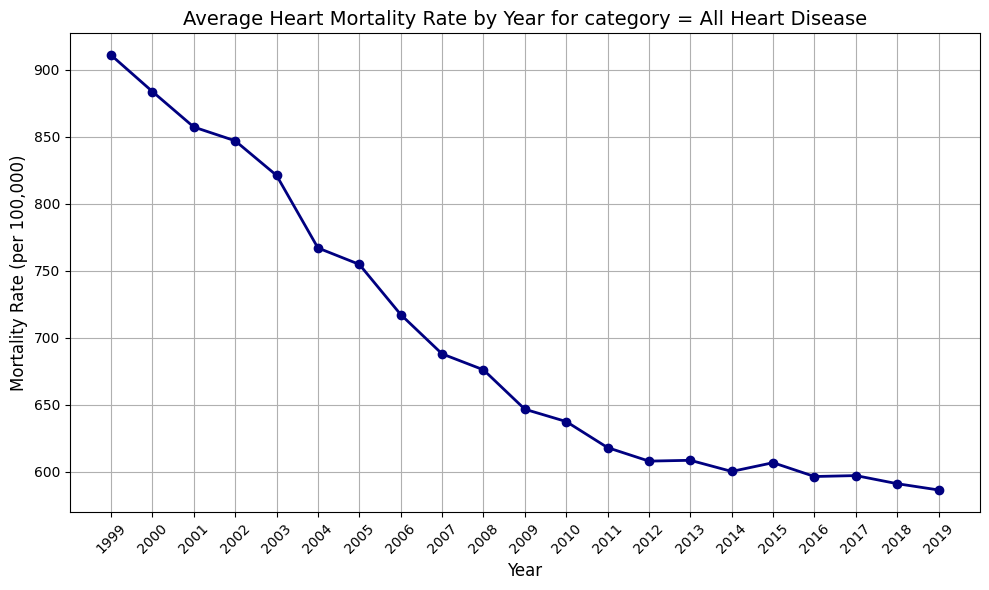

In [ ]:
# Step 3: Process results into lists
years = [row[0] for row in results]
rates = [row[1] for row in results]

# Step 4: Plot with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(years, rates, marker='o', color='navy', linewidth=2)

# Formatting
plt.title('Average Heart Mortality Rate by Year for category = All Heart Disease', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mortality Rate (per 100,000)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()



In [ ]:
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Test123',
    database='Cardiovascular_Disease'  # connect directly to the DB
)

cursor = conn.cursor()
# Average Mortality by State for the Year 2019
cursor.execute('''SELECT locationabbr AS state, ROUND(AVG(data_value), 2) AS avg_mortality_rate FROM heart_disease
WHERE year = 2019 GROUP BY locationabbr ORDER BY avg_mortality_rate DESC;''')
results = cursor.fetchall()
print("Year | Average Mortality Rate")

for row in results:
    print(f"{row[0]} | {row[1]}")

    

Year | Average Mortality Rate
MS | 769.59
AR | 741.59
AL | 739.61
OK | 736.8
LA | 726.5
KY | 703.18
TN | 701.13
WV | 665.26
MO | 659.7
MI | 629.55
OH | 629.25
GA | 620.42
IA | 611.31
IN | 605.24
TX | 588.91
IL | 588.03
PA | 573.34
NV | 571.31
SC | 570.47
VA | 564.58
KS | 563.27
VT | 552.16
MD | 544.96
NM | 537.48
WI | 537.4
MT | 536.17
NC | 533.49
NY | 531.97
NJ | 529.72
NE | 528.16
WY | 514.42
ID | 512.22
UT | 495.16
ME | 490.2
ND | 488.8
FL | 481.94
DE | 480.83
SD | 479.53
NH | 472.41
DC | 468.49
CA | 468.44
AZ | 462.4
HI | 459.78
WA | 454.98
MN | 451.92
CT | 442.24
OR | 440.6
RI | 434.14
CO | 424.22
MA | 394.56
AK | 363.98


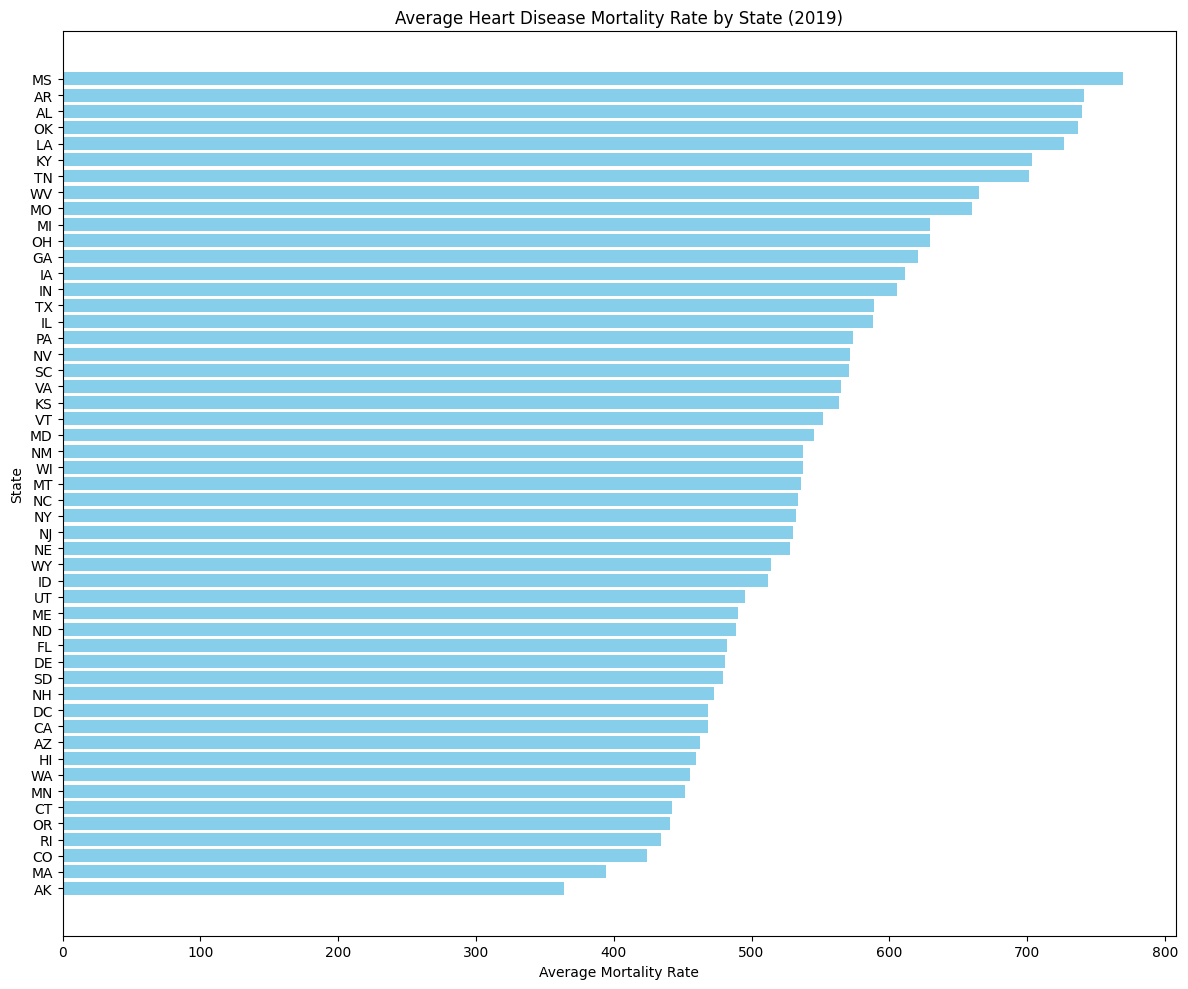

In [ ]:
# Separate data into two lists for plotting
states = [row[0] for row in results]
rates = [row[1] for row in results]

# Plotting
plt.figure(figsize=(12, 10))
plt.barh(states, rates, color='skyblue')
plt.xlabel('Average Mortality Rate')
plt.ylabel('State')
plt.title('Average Heart Disease Mortality Rate by State (2019)')
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()

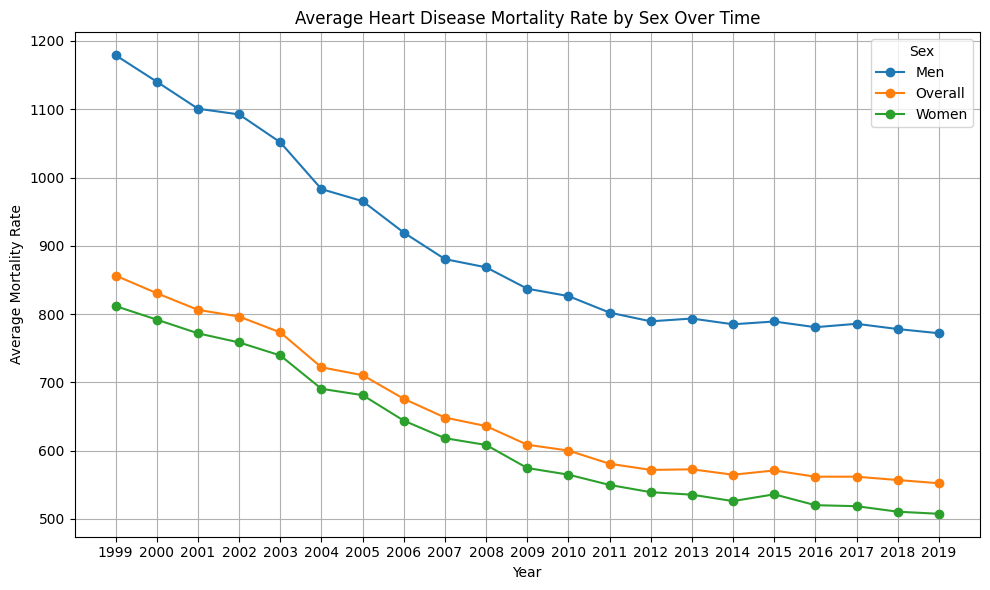

In [ ]:
import pymysql
import matplotlib.pyplot as plt
from collections import defaultdict

# Connect to MySQL
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Test123',
    database='Cardiovascular_Disease'
)

cursor = conn.cursor()

# Query: Mortality Rate by Sex Over Time (using stratification1)
cursor.execute('''
    SELECT year, stratification3 AS sex, 
           ROUND(AVG(data_value), 2) AS avg_mortality_rate
    FROM heart_disease
    WHERE stratification3 IN ('Men', 'Women', 'Overall')
    GROUP BY year, stratification3
    ORDER BY year, stratification3
''')

results = cursor.fetchall()

data_by_sex = {}

for year, sex, rate in results:
    if sex:
        if sex not in data_by_sex:
            data_by_sex[sex] = {"year": [], "rate": []}
        data_by_sex[sex]["year"].append(year)
        data_by_sex[sex]["rate"].append(rate)

# Plotting
plt.figure(figsize=(10, 6))
for sex, data in data_by_sex.items():
    plt.plot(data["year"], data["rate"], marker='o', label=sex)

plt.title("Average Heart Disease Mortality Rate by Sex Over Time")
plt.xlabel("Year")
plt.ylabel("Average Mortality Rate")
plt.legend(title="Sex")
plt.grid(True)
plt.tight_layout()
plt.show()

cursor.close()
conn.close()

In [ ]:
# Similarly I can do 


#---------------------------------------------------------
# Mortality Rate by Age Group in 2019
# SELECT 
#     stratification2 AS age_group,
#     ROUND(AVG(data_value), 2) AS avg_rate_2019
# FROM cardio_mortality
# WHERE year = 2019 AND stratification2 IS NOT NULL
# GROUP BY stratification2
# ORDER BY avg_rate_2019 DESC;
#---------------------------------------------------------
# Mortality Rate by Race/Ethnicity (Overall)
# SELECT 
#     stratification3 AS race_ethnicity,
#     ROUND(AVG(data_value), 2) AS avg_mortality_rate
# FROM cardio_mortality
# WHERE stratification3 IS NOT NULL
# GROUP BY stratification3
# ORDER BY avg_mortality_rate DESC;
#---------------------------------------------------------
# Top 10 Locations With Highest Average Mortality (All Years)
# SELECT 
#     locationdesc,
#     ROUND(AVG(data_value), 2) AS avg_mortality
# FROM cardio_mortality
# GROUP BY locationdesc
# ORDER BY avg_mortality DESC
# LIMIT 10;

In [ ]:
df_stroke = df_full[df_full['topic'] == 'All stroke'].copy()
df_stroke

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,...,data_value_footnote,confidence_limit_low,confidence_limit_high,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,locationid
21,2015,AL,Autauga,County,NVSS,Cardiovascular Diseases,All stroke,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
22,2010,AL,Autauga,County,NVSS,Cardiovascular Diseases,All stroke,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
23,2011,AL,Autauga,County,NVSS,Cardiovascular Diseases,All stroke,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
24,2018,AL,Autauga,County,NVSS,Cardiovascular Diseases,All stroke,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
25,2002,AL,Autauga,County,NVSS,Cardiovascular Diseases,All stroke,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770213,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,All stroke,NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Black (Non-Hispanic),Sex,Overall,56045
5770222,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,All stroke,NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,56045
5770223,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,All stroke,NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,56045
5770232,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,All stroke,-12.5,%,Total percent change,...,NA,-32.1,17.9,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045


In [ ]:

df_stroke.shape
# df_stroke.info()
# df_stroke.head()

(1154048, 21)

In [ ]:
df_cvd = df_full[df_full['topic'] == 'Cardiovascular disease (CVD)'].copy()
df_cvd

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,...,data_value_footnote,confidence_limit_low,confidence_limit_high,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,locationid
64,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
65,2017,AL,Autauga,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
66,2015,AL,Autauga,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
67,2016,AL,Autauga,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
68,2003,AL,Autauga,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770217,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Black (Non-Hispanic),Sex,Overall,56045
5770226,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,56045
5770227,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,56045
5770236,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),-6.7,%,Total percent change,...,NA,-20.4,5.7,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045


In [ ]:
df_cvd.shape

(1154048, 21)

In [ ]:
df_chd = df_full[df_full['topic'] == 'Coronary heart disease (CHD)'].copy()
df_chd


,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,...,data_value_footnote,confidence_limit_low,confidence_limit_high,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,locationid
42,2016,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
43,2017,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
44,2015,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
45,2011,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
46,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770215,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Black (Non-Hispanic),Sex,Overall,56045
5770224,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,56045
5770225,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,56045
5770234,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),-3.4,%,Total percent change,...,NA,-27.5,29.9,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045


In [ ]:
df_chd.shape

(1154048, 21)

In [ ]:
df_heart_failure = df_full[df_full['topic'] == 'Heart failure'].copy()
df_heart_failure

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,...,data_value_footnote,confidence_limit_low,confidence_limit_high,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,locationid
86,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,Heart failure,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
87,2017,AL,Autauga,County,NVSS,Cardiovascular Diseases,Heart failure,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
88,2018,AL,Autauga,County,NVSS,Cardiovascular Diseases,Heart failure,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
89,2015,AL,Autauga,County,NVSS,Cardiovascular Diseases,Heart failure,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
90,2003,AL,Autauga,County,NVSS,Cardiovascular Diseases,Heart failure,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770219,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,Heart failure,NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Black (Non-Hispanic),Sex,Overall,56045
5770228,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,Heart failure,NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,56045
5770229,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,Heart failure,NA,%,Total percent change,...,Value suppressed,NA,NA,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,56045
5770238,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,Heart failure,-20,%,Total percent change,...,NA,-41.7,-2.9,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045


In [ ]:
df_heart_failure.shape